In [252]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [253]:
df = pd.read_csv('b_depressed.csv')
df.head().T

,0,1,2,3,4
Survey_id,926.0,747.0,1190.0,1065.0,806.0
Ville_id,91.0,57.0,115.0,97.0,42.0
sex,1.0,1.0,1.0,1.0,0.0
Age,28.0,23.0,22.0,27.0,59.0
Married,1.0,1.0,1.0,1.0,0.0
Number_children,4.0,3.0,3.0,2.0,4.0
education_level,10.0,8.0,9.0,10.0,10.0
total_members,5.0,5.0,5.0,4.0,6.0
gained_asset,28912201.0,28912201.0,28912201.0,52667108.0,82606287.0
durable_asset,22861940.0,22861940.0,22861940.0,19698904.0,17352654.0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [255]:
# make all dataframe column headers lowercase
df.columns = df.columns.str.lower()

In [256]:
delete_cols = ['survey_id', 'ville_id']
df.drop(columns=delete_cols, inplace=True)

In [257]:
df.duplicated().sum()

np.int64(45)

In [258]:
df.isnull().sum()

sex                       0
age                       0
married                   0
number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [259]:
df['no_lasting_investmen'].fillna(0,inplace=True)

/tmp/ipykernel_1714/3484205889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_lasting_investmen'].fillna(0,inplace=True)


In [260]:
df.drop_duplicates(inplace=True)

In [261]:
round(df.describe(),2)

,sex,age,married,number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,...,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00,1384.00
mean,0.92,35.08,0.77,2.89,8.67,4.97,33788019.97,27313127.24,27555569.69,32670833.38,...,0.19,0.26,0.11,0.27,34656104.94,35625748.24,0.22,33141147.43,33290934.68,0.17
std,0.28,14.04,0.42,1.89,2.95,1.82,20343529.28,18432819.65,18022768.00,21328054.82,...,0.39,0.44,0.31,0.44,21097815.12,21451285.49,0.41,21542258.38,22145163.44,0.38
min,0.00,17.00,0.00,0.00,1.00,1.00,325112.00,162556.00,172966.00,262919.00,...,0.00,0.00,0.00,0.00,325112.00,271505.00,0.00,74292.00,0.00,0.00
25%,1.00,25.00,1.00,2.00,8.00,4.00,22426605.50,18910149.00,23399979.00,20019212.00,...,0.00,0.00,0.00,0.00,22388151.50,21909916.00,0.00,19331992.50,19429201.50,0.00
50%,1.00,31.00,1.00,3.00,9.00,5.00,28912201.00,22861940.00,23399979.00,26692283.00,...,0.00,0.00,0.00,0.00,30028818.00,31363432.00,0.00,28411718.00,28292707.00,0.00
75%,1.00,42.00,1.00,4.00,10.00,6.00,37907918.00,27041952.75,23399979.00,40038424.00,...,0.00,1.00,0.00,1.00,42707653.00,44487137.00,0.00,40515220.25,41940246.50,0.00
max,1.00,91.00,1.00,11.00,19.00,12.00,99127548.00,99615601.00,99926758.00,99295282.00,...,1.00,1.00,1.00,1.00,99789095.00,99651194.00,1.00,99446667.00,99651194.00,1.00


## EDA

In [262]:
for d in df :
    print(f"\nTop 5 values for '{d}':")
    print(df[d].value_counts().head())


Top 5 values for 'sex':
sex
1    1268
0     116
Name: count, dtype: int64

Top 5 values for 'age':
age
25    75
23    71
26    65
22    64
28    60
Name: count, dtype: int64

Top 5 values for 'married':
married
1    1060
0     324
Name: count, dtype: int64

Top 5 values for 'number_children':
number_children
3    291
2    281
4    222
1    181
0    153
Name: count, dtype: int64

Top 5 values for 'education_level':
education_level
10    406
9     285
8     166
7      94
1      82
Name: count, dtype: int64

Top 5 values for 'total_members':
total_members
5    566
4    203
6    145
3    136
7     98
Name: count, dtype: int64

Top 5 values for 'gained_asset':
gained_asset
28912201    515
82606287     50
41303144     40
20651573     31
16521257     28
Name: count, dtype: int64

Top 5 values for 'durable_asset':
durable_asset
22861940    503
16015369      8
96092216      7
12812296      7
11851374      6
Name: count, dtype: int64

Top 5 values for 'save_asset':
save_asset
23399979    918
16

In [263]:
df.dtypes

sex                        int64
age                        int64
married                    int64
number_children            int64
education_level            int64
total_members              int64
gained_asset               int64
durable_asset              int64
save_asset                 int64
living_expenses            int64
other_expenses             int64
incoming_salary            int64
incoming_own_farm          int64
incoming_business          int64
incoming_no_business       int64
incoming_agricultural      int64
farm_expenses              int64
labor_primary              int64
lasting_investment         int64
no_lasting_investmen     float64
depressed                  int64
dtype: object

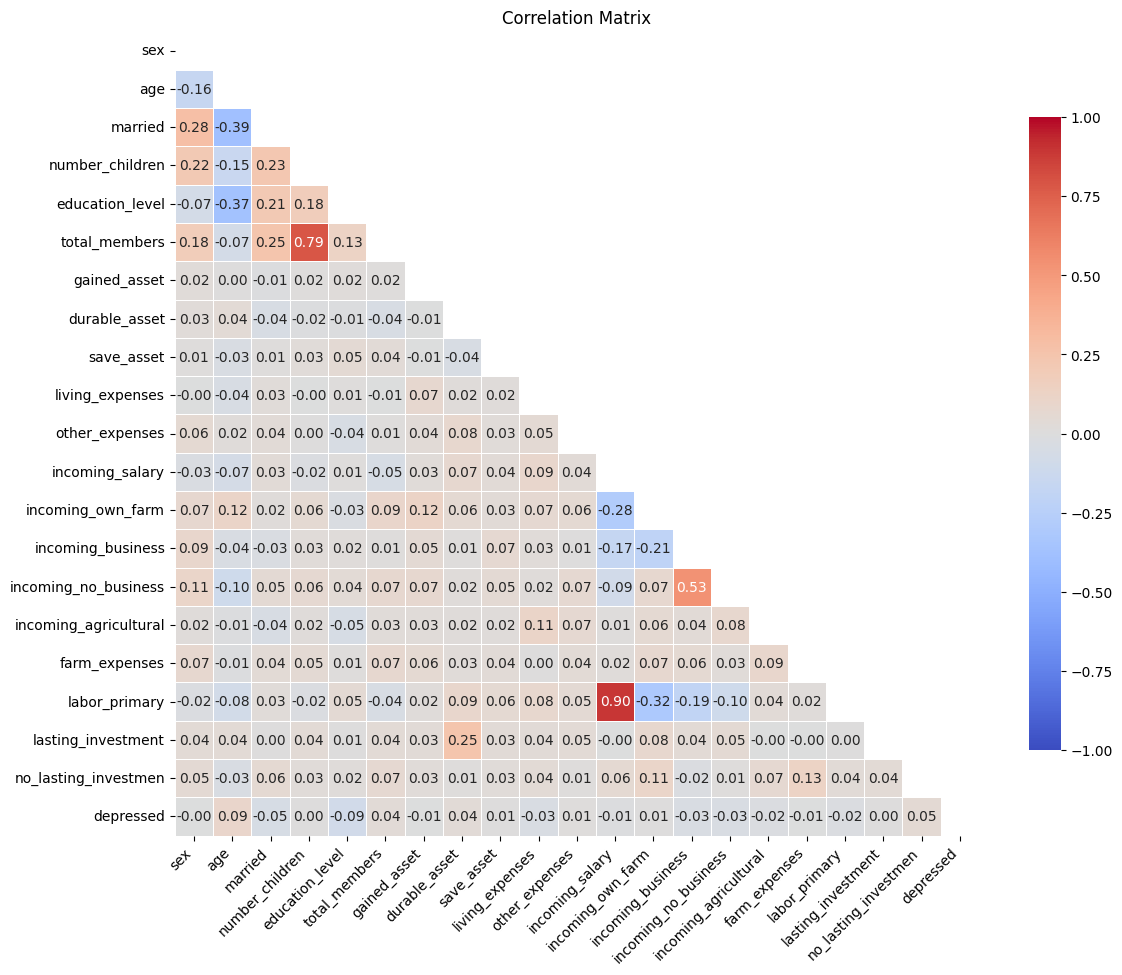

In [264]:
# compute correlation matrix and plot heatmap
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

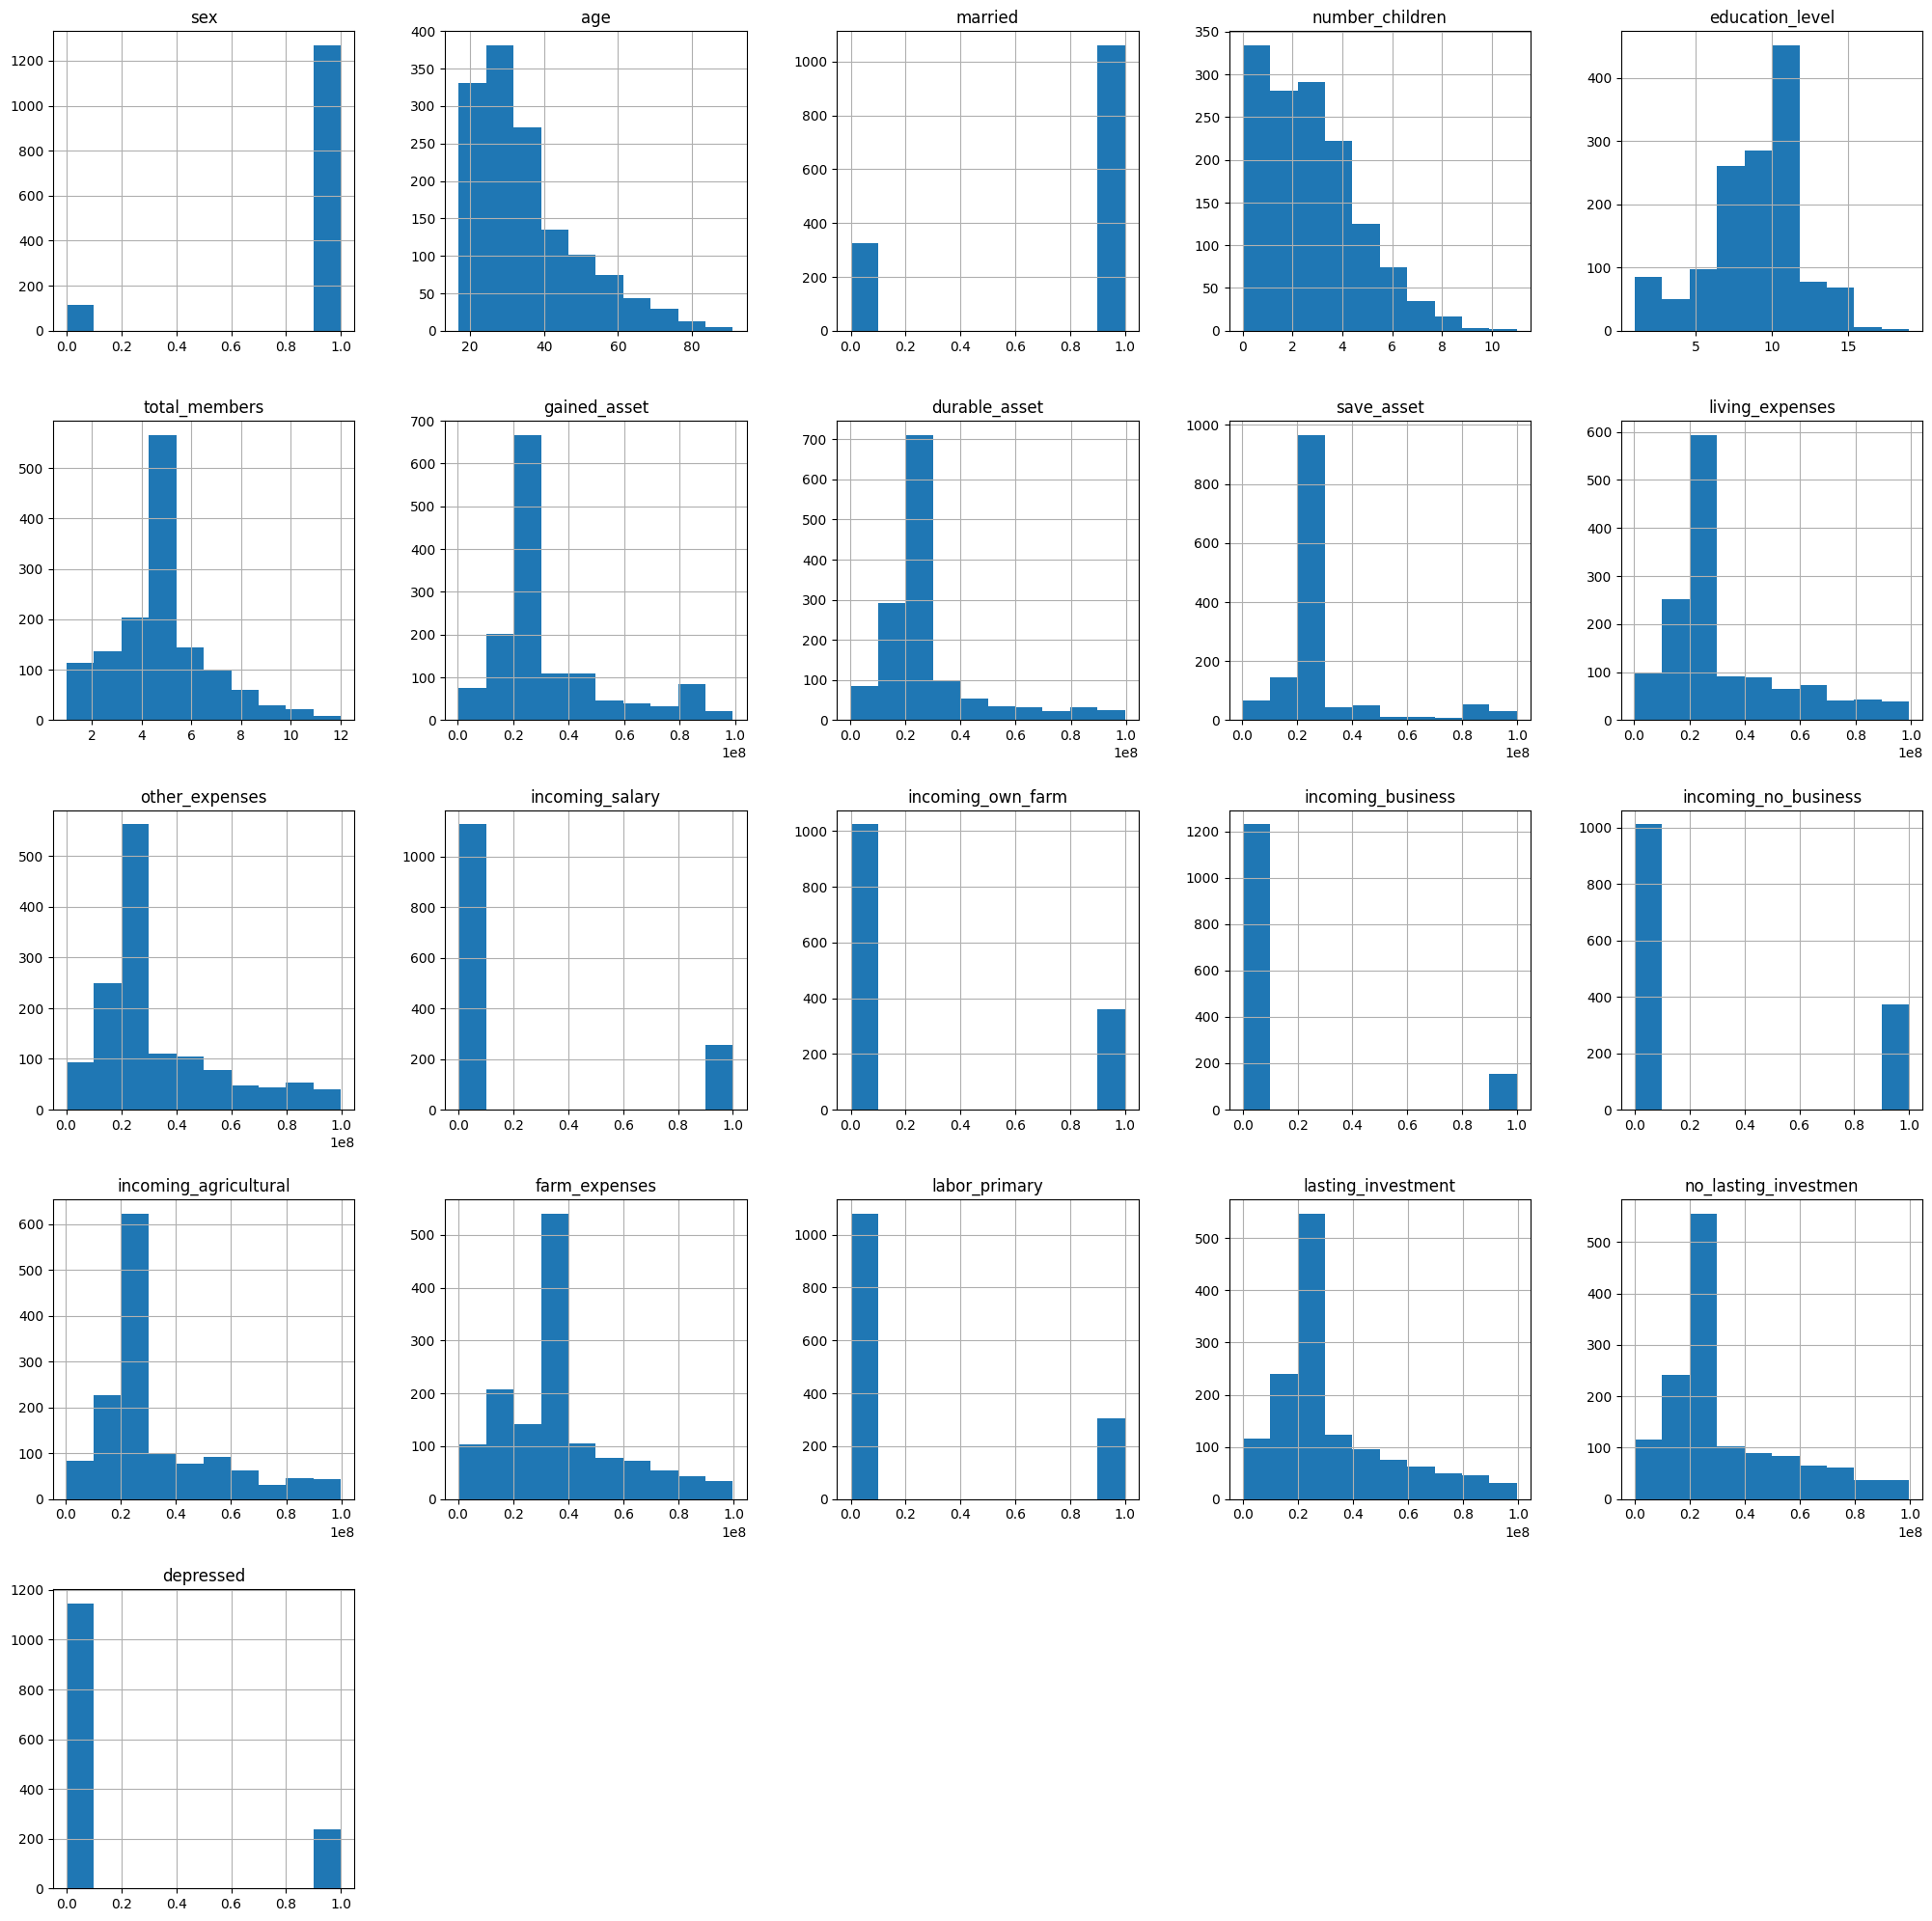

In [265]:
df.hist(figsize=(25,25))
plt.show()

In [266]:
#lets see the distrubution
df.depressed.value_counts(normalize = True)
## depressed rate aka the mean here

depressed
0    0.828757
1    0.171243
Name: proportion, dtype: float64

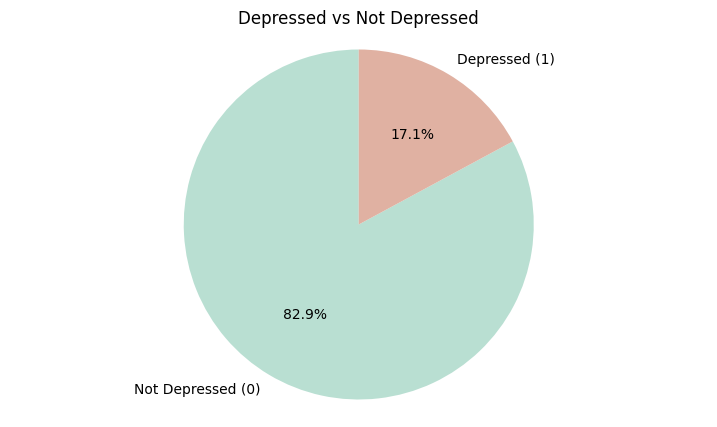

In [267]:
# pie chart for depressed vs not depressed (uses existing `colors` variable)
counts = df['depressed'].value_counts()
sizes = [counts.get(0, 0), counts.get(1, 0)]
labels = ['Not Depressed (0)', 'Depressed (1)']

plt.figure(figsize=(9,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=["#b9dfd2","#e0b1a2"])
plt.title('Depressed vs Not Depressed')
plt.axis('equal')
plt.show()


## Setting up environment
 - Train 60% | Val 20% | Test 20%

<details>
    
    [image.png](attachment:c0356555-af73-4b9a-97a7-2ff6441a25b6.png)
    
</details>

In [268]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
#train_test_split?

In [269]:
# 80% data | 20% test data
df_full_train, df_test = train_test_split(df,test_size = 0.2, random_state=1)

In [270]:
len(df_full_train),len(df_test)

(1107, 277)

In [271]:
# need to split our 80..20% of that data is not actual, we need to get 1/4
df_train, df_val = train_test_split(df_full_train,test_size = 0.25, random_state=1)

In [272]:
len(df_train), len(df_val),len(df_test)

(830, 277, 277)

In [273]:
#reseting their index
for d in [df_train, df_val, df_test, df_full_train]:
    d.reset_index(drop=True, inplace=True)

In [274]:
#seperating target variables
y_train = df_train.depressed.values
y_val  = df_val.depressed.values
y_test = df_test.depressed.values
y_full_train = df_full_train.depressed.values

In [275]:
#deleting target variables from train data
del df_train['depressed']
del df_val['depressed']
del df_test['depressed']
##del df_full_train['depressed']

## More EDA and Feature Engineering

In [276]:
global_depressed = df_full_train.depressed.mean()
round(global_depressed,5)

np.float64(0.16621)

### Likelihood Classification Logic

For each group:

- **diff** = mean_depressed_of_group − global_depressed_rate  
- **risk** = mean_depressed_of_group ÷ global_depressed_rate  

### Decision Rule

- If **risk > 1** *and* **diff > 0** → **More likely to be depressed**
- Otherwise → **Not likely to be depressed**


In [277]:
from IPython.display import display

In [278]:
for c in df_full_train:
    if df_full_train[c].nunique() > 15 or c == 'depressed' :
        continue

    print(c)
    
    df_group = df_full_train.groupby(c).depressed.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_depressed
    df_group['risk'] = df_group['mean'] / global_depressed

    # Create the new likelihood column
    df_group['likelihood'] = df_group.apply(
        lambda row: 'More likely to be depressed' 
                    if (row['risk'] > 1 and row['diff'] > 0) 
                    else 'Not likely to be depressed',
        axis=1
    )

    display(df_group)
    print()
    print()

sex


,mean,count,diff,risk,likelihood
sex,,,,,
0,0.180000,100,0.013785,1.082935,More likely to be depressed
1,0.164846,1007,-0.001369,0.991764,Not likely to be depressed




married


,mean,count,diff,risk,likelihood
married,,,,,
0,0.214815,270,0.048600,1.292391,More likely to be depressed
1,0.150538,837,-0.015677,0.905680,Not likely to be depressed




number_children


,mean,count,diff,risk,likelihood
number_children,,,,,
0,0.277778,126,0.111563,1.671196,More likely to be depressed
1,0.061644,146,-0.104571,0.370868,Not likely to be depressed
2,0.185185,216,0.018970,1.114130,More likely to be depressed
3,0.170940,234,0.004725,1.028428,More likely to be depressed
4,0.163043,184,-0.003172,0.980919,Not likely to be depressed
5,0.147368,95,-0.018847,0.886613,Not likely to be depressed
6,0.101695,59,-0.064520,0.611828,Not likely to be depressed
7,0.222222,27,0.056007,1.336957,More likely to be depressed
8,0.133333,15,-0.032882,0.802174,Not likely to be depressed




total_members


,mean,count,diff,risk,likelihood
total_members,,,,,
1,0.242424,33,0.076209,1.458498,More likely to be depressed
2,0.129032,62,-0.037183,0.776297,Not likely to be depressed
3,0.049020,102,-0.117195,0.294917,Not likely to be depressed
4,0.184211,152,0.017996,1.108267,More likely to be depressed
5,0.193548,465,0.027333,1.164446,More likely to be depressed
6,0.134454,119,-0.031761,0.808915,Not likely to be depressed
7,0.207792,77,0.041577,1.250141,More likely to be depressed
8,0.113636,44,-0.052579,0.683671,Not likely to be depressed
9,0.222222,27,0.056007,1.336957,More likely to be depressed




incoming_salary


,mean,count,diff,risk,likelihood
incoming_salary,,,,,
0,0.169045,911,0.002830,1.017026,More likely to be depressed
1,0.153061,196,-0.013154,0.920863,Not likely to be depressed




incoming_own_farm


,mean,count,diff,risk,likelihood
incoming_own_farm,,,,,
0,0.169306,821,0.003091,1.018595,More likely to be depressed
1,0.157343,286,-0.008872,0.946621,Not likely to be depressed




incoming_business


,mean,count,diff,risk,likelihood
incoming_business,,,,,
0,0.171748,984,0.005533,1.033288,More likely to be depressed
1,0.121951,123,-0.044264,0.733696,Not likely to be depressed




incoming_no_business


,mean,count,diff,risk,likelihood
incoming_no_business,,,,,
0,0.177778,810,0.011563,1.069565,More likely to be depressed
1,0.134680,297,-0.031535,0.810277,Not likely to be depressed




labor_primary


,mean,count,diff,risk,likelihood
labor_primary,,,,,
0,0.172018,872,0.005803,1.034915,More likely to be depressed
1,0.144681,235,-0.021534,0.870444,Not likely to be depressed


### Training Model

In [279]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

full_train_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.transform(full_train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [280]:
##dicts
train_dict[0]

{'sex': 1,
 'age': 52,
 'married': 1,
 'number_children': 2,
 'education_level': 9,
 'total_members': 5,
 'gained_asset': 28912201,
 'durable_asset': 22861940,
 'save_asset': 23399979,
 'living_expenses': 26692283,
 'other_expenses': 28203066,
 'incoming_salary': 0,
 'incoming_own_farm': 0,
 'incoming_business': 0,
 'incoming_no_business': 0,
 'incoming_agricultural': 30028818,
 'farm_expenses': 31363432,
 'labor_primary': 0,
 'lasting_investment': 28411718,
 'no_lasting_investmen': 28292707.0}

In [281]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [282]:
y_pred = model.predict(X_val)

In [283]:
from sklearn.metrics import accuracy_score
print(f"""The Accuracy : {accuracy_score(y_val, y_pred) * 100:.2f}%""")

The Accuracy : 83.03%


In [284]:
print('Precision:', precision_score(y_val, y_pred))
print('Recall:', recall_score(y_val, y_pred))
print('F1 score:', f1_score(y_val, y_pred))

Precision: 0.0
Recall: 0.0
F1 score: 0.0


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Using Full Train


In [285]:
del df_full_train['depressed']

In [286]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [287]:
#Hard prediction on test data
y_pred = model.predict(X_test)
print(f"""The Accuracy : {accuracy_score(y_test, y_pred) * 100:.2f}%""")

The Accuracy : 53.79%


In [288]:
#Soft prediction on test data
y_pred = model.predict_proba(X_val)[:,1] >= 0.6
#depressed_decision = y_pred >= 0.8
print(f"""The Accuracy : {accuracy_score(y_test, y_pred) * 100:.2f}%""")

The Accuracy : 74.37%


In [289]:
#LOOKING AT THE CONFUSION METRIX,
print(confusion_matrix(y_test, y_pred))

[[201  23]
 [ 48   5]]


|                | Predicted 0 (Not Depressed) | Predicted 1 (Depressed) |
|----------------|-----------------------------|-------------------------|
| Actual 0 (True Negative)  | TN                          | FP                      |
| Actual 1 (True Positive)  | FN                          | TP                      |

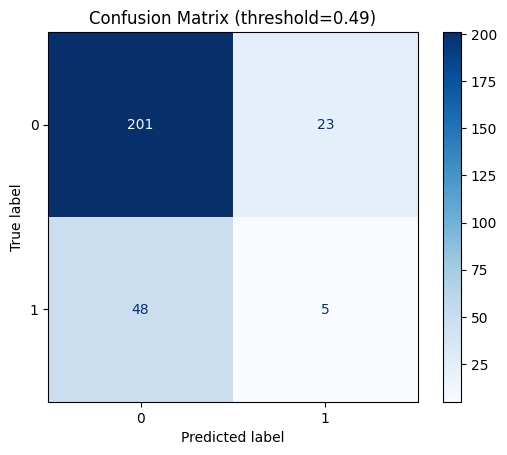

In [290]:

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap=plt.cm.Blues,
)
disp.ax_.set_title("Confusion Matrix (threshold=0.49)")
plt.show()

In [291]:
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision: 0.17857142857142858
Recall: 0.09433962264150944
F1 score: 0.12345679012345678
